#### pathway topology inference

In [1]:
import memo_py as me
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
%matplotlib inline

/Users/m651s/opt/anaconda3/envs/cd44_project/lib/python3.7/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


##### true model

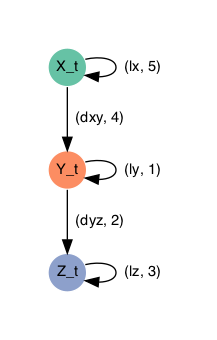

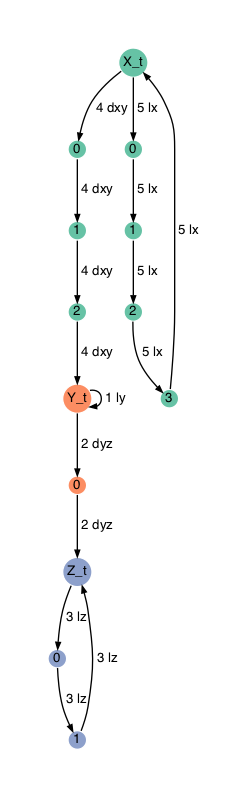

In [2]:
# define the true topology and plot network
t = [
        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'dxy', 'type': 'S -> E', 'reaction_steps': 4},
        {'start': 'Y_t', 'end': 'Z_t', 'rate_symbol': 'dyz', 'type': 'S -> E', 'reaction_steps': 2},
        {'start': 'X_t', 'end': 'X_t', 'rate_symbol': 'lx', 'type': 'S -> S + S', 'reaction_steps': 5},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'ly', 'type': 'S -> S + S', 'reaction_steps': 1},
        {'start': 'Z_t', 'end': 'Z_t', 'rate_symbol': 'lz', 'type': 'S -> S + S', 'reaction_steps': 3},
        ]

net = me.Network('net_true')
net.structure(t)
me.plots.net_main_plot(net)
me.plots.net_hidden_plot(net, layout='dot')

In [3]:
# set true parameters and simulate model
initial_values = {'X_t': 1, 'Y_t': 0, 'Z_t': 0}
theta_values = {'dxy': 0.4, 'dyz': 0.15, 'lx': 0.2, 'ly': 0.3, 'lz': 0.4}
time_values = np.linspace(0.0, 10.0, num=100, endpoint=True)
variables = {'X_t': ('X_t', ), 'Y_t': ('Y_t', ), 'Z_t': ('Z_t', )}

sim = me.Simulation(net)
res = sim.simulate('moments', initial_values, theta_values, time_values, variables)
# res

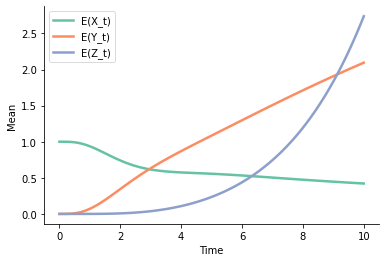

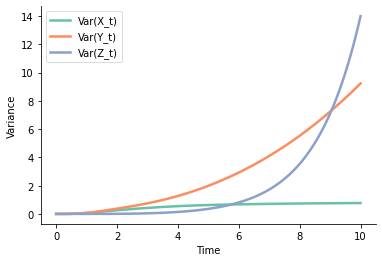

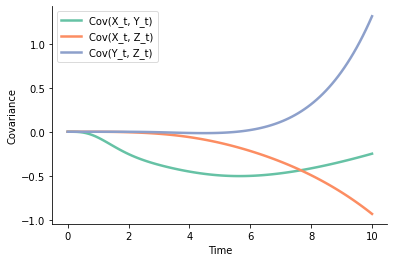

In [4]:
me.plots.sim_mean_plot(sim)
me.plots.sim_variance_plot(sim)
me.plots.sim_covariance_plot(sim)

##### *in silico* data

In [6]:
num_iter = 1000
time_values = np.linspace(0.0, 10.0, num=11, endpoint=True)

sim = me.Simulation(net)
res_list = list()

for __ in range(num_iter):
    res_list.append(sim.simulate('gillespie', initial_values, theta_values, time_values, variables)[1])

in_silico_counts = np.array(res_list)

In [7]:
data = me.Data('data_pathway_topology_n1000_t11_2')
data.load(['X_t', 'Y_t', 'Z_t'], time_values, in_silico_counts, bootstrap_samples=10000, basic_sigma=1.0/num_iter)

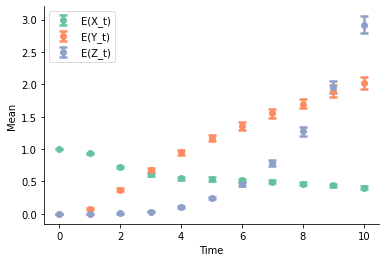

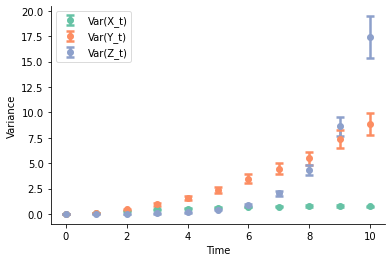

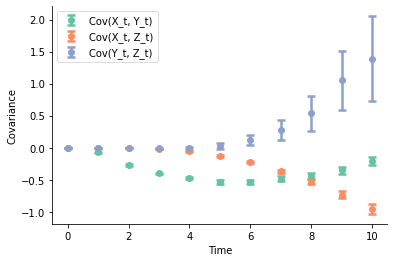

In [8]:
me.plots.data_mean_plot(data, save='data_pathway_topology_n1000_t11_2_mean.pdf')
me.plots.data_variance_plot(data, save='data_pathway_topology_n1000_t11_2_var.pdf')
me.plots.data_covariance_plot(data, save='data_pathway_topology_n1000_t11_2_cov.pdf')

In [9]:
# print(data.data_name)
# with open('data_pathway_topology_n1000_t11_2.pickle', 'wb') as file_:
#     pickle.dump(data, file_)

data_pathway_topology_n1000_t11_2


In [10]:
# data.data_mean
# data.data_variance
# data.data_covariance

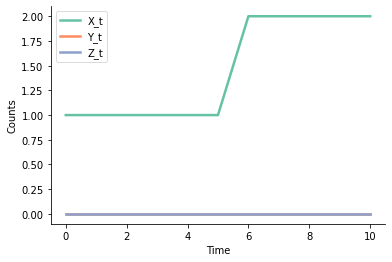

In [11]:
me.plots.sim_counts_plot(sim)

##### find parameters of true model

In [11]:
data = pickle.load(open('data_pathway_topology_n1000_t11_2.pickle', 'rb'))

In [12]:
s = {'initial_values': initial_values, 
         'theta_bounds': {'dxy': (0.0, 1.0), 'dyz': (0.0, 1.0), 'lx': (0.0, 1.0), 'ly': (0.0, 1.0), 'lz': (0.0, 1.0)}, 
         'variables': variables}

model_list = [('model_true', t, s)]

d = {
# model set
'model_set': model_list,

# data/model settings
'data': data,
'mean_only': False, # True or False

# nested sampling settings
'nlive':                    250, # 250 # 1000
'tolerance':                0.1, # 0.1 # 0.05 # 0.01
'bound':                    'multi',
'sample':                   'unif'
}

In [13]:
# estimation
res = me.select_models(d)

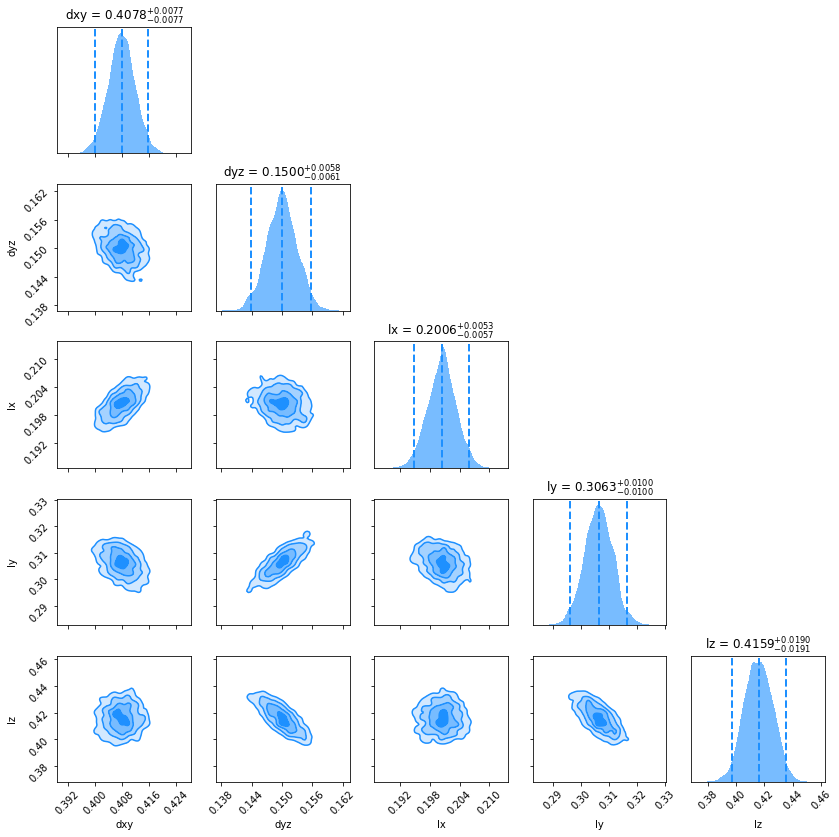

In [14]:
est = res[0]
me.plots.est_corner_kernel_plot(est)

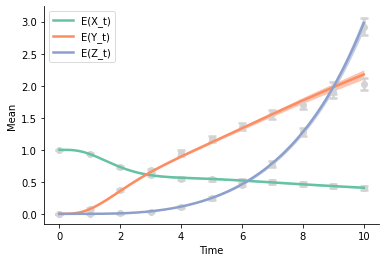

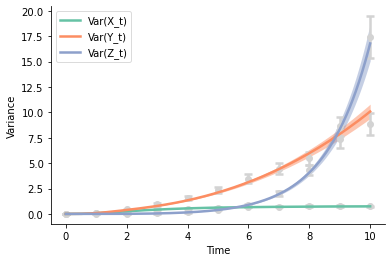

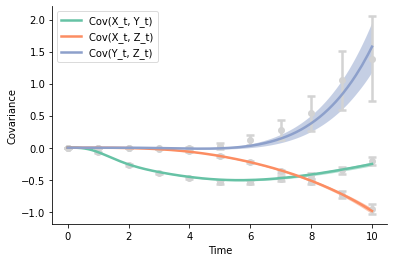

In [15]:
est = res[0]
me.plots.est_bestfit_mean_plot(est, data=True, conf=True)
me.plots.est_bestfit_variance_plot(est, data=True, conf=True)
me.plots.est_bestfit_covariance_plot(est, data=True, conf=True)

##### estimate waiting times for the true topology

In [2]:
### we use script 'model_select_topologies.py' to do this

# load result
res = pickle.load(open('estimation_data_pathway_topology_n1000_t11_2_surround.pickle', 'rb'))

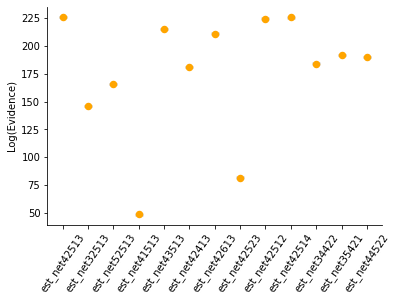

In [3]:
me.plots.selection_plot(res, est_type='evidence', save='logevid.pdf')

In [4]:
model_probs = me.selection.compute_model_probabilities(res)
print(model_probs)

[4.69241076e-01 1.17050761e-35 5.51607770e-27 7.95253734e-78
 1.41944097e-05 2.32393276e-20 1.79206217e-07 1.60729226e-63
 1.36491483e-01 3.94253067e-01 4.46286032e-19 9.93963416e-16
 1.49382334e-16]


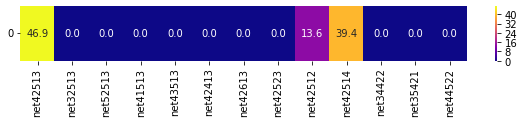

In [5]:
plt.figure(figsize=(10,1))
df = pd.DataFrame(np.array([model_probs]) * 100.0, columns=[est.net.net_name for est in res]) # , index=rows
sns.heatmap(df, cmap='plasma', annot=True, fmt='.1f') # annot=True
plt.yticks(rotation=0, va='center')
plt.savefig('./model_probs.pdf', bbox_inches='tight')

net41513


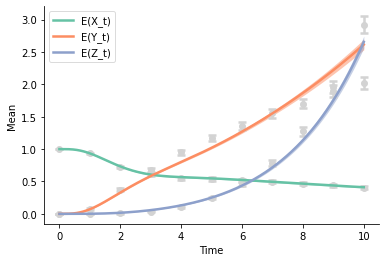

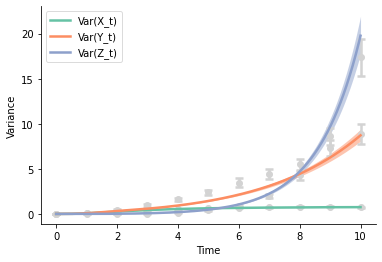

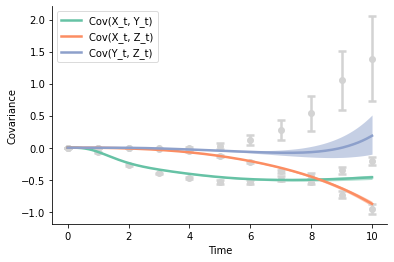

In [9]:
est = res[3]
print(est.net.net_name)
me.plots.est_bestfit_mean_plot(est, data=True, conf=True, save='res_mean_net41513.pdf')
me.plots.est_bestfit_variance_plot(est, data=True, conf=True, save='res_var_net41513.pdf')
me.plots.est_bestfit_covariance_plot(est, data=True, conf=True, save='res_cov_net41513.pdf')

# est = res[1]
# me.plots.est_bestfit_mean_plot(est, data=True, conf=True)
# me.plots.est_bestfit_variance_plot(est, data=True, conf=True)
# me.plots.est_bestfit_covariance_plot(est, data=True, conf=True)

# est = res[2]
# me.plots.est_bestfit_mean_plot(est, data=True, conf=True)
# me.plots.est_bestfit_variance_plot(est, data=True, conf=True)
# me.plots.est_bestfit_covariance_plot(est, data=True, conf=True)

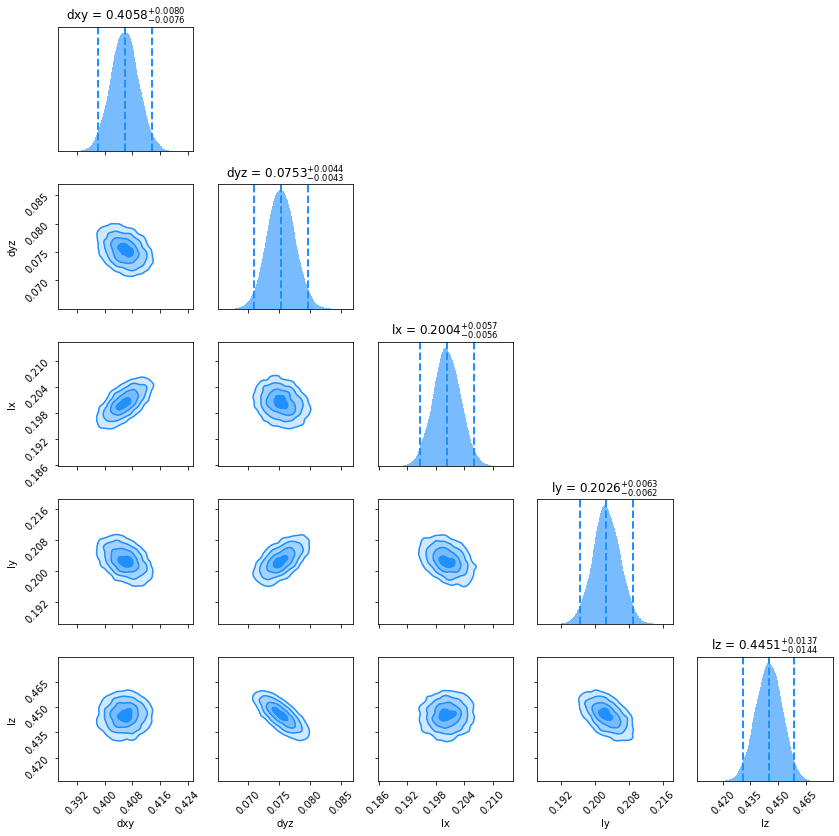

In [10]:
est = res[3]
me.plots.est_corner_kernel_plot(est, save='corner_net41513.pdf')

##### covariance/Markov

Maybe not so special as I thought first; also the 'positive' covariance of the true model is slightly negative at first.

In [43]:
def def_model(n_dxy, n_dyz, n_lx, n_ly, n_lz):
    initial_values = {'X_t': 1, 'Y_t': 0, 'Z_t': 0}
    theta_bounds = {'dxy': (0.0, 1.0), 'dyz': (0.0, 1.0), 'lx': (0.0, 1.0), 'ly': (0.0, 1.0), 'lz': (0.0, 1.0)}
    variables = {'X_t': ('X_t', ), 'Y_t': ('Y_t', ), 'Z_t': ('Z_t', )}

    name = f'net{n_dxy}{n_dyz}{n_lx}{n_ly}{n_lz}'
    t = [
        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'dxy', 'type': 'S -> E', 'reaction_steps': n_dxy},
        {'start': 'Y_t', 'end': 'Z_t', 'rate_symbol': 'dyz', 'type': 'S -> E', 'reaction_steps': n_dyz},
        {'start': 'X_t', 'end': 'X_t', 'rate_symbol': 'lx', 'type': 'S -> S + S', 'reaction_steps': n_lx},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'ly', 'type': 'S -> S + S', 'reaction_steps': n_ly},
        {'start': 'Z_t', 'end': 'Z_t', 'rate_symbol': 'lz', 'type': 'S -> S + S', 'reaction_steps': n_lz},
        ]
    s = {'initial_values': initial_values,
         'theta_bounds': theta_bounds,
         'variables': variables}
    return (name, t, s)

In [69]:
initial_values = {'X_t': 1, 'Y_t': 0, 'Z_t': 0}
theta_values = {'dxy': 0.4, 'dyz': 0.15, 'lx': 0.2, 'ly': 0.3, 'lz': 0.4}
time_values = np.linspace(0.0, 10.0, num=100, endpoint=True)
variables = {'X_t': ('X_t', ), 'Y_t': ('Y_t', ), 'Z_t': ('Z_t', )}

net_cov = me.Network('net_cov')
net_cov.structure(def_model(4,2,5,1,3)[1]) # net_true: 4,2,5,1,3
sim = me.Simulation(net_cov)
res = sim.simulate('moments', initial_values, theta_values, time_values, variables)

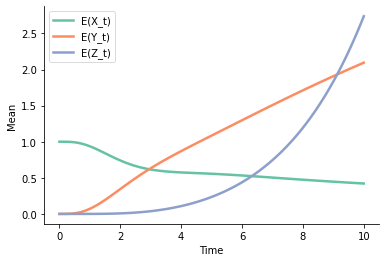

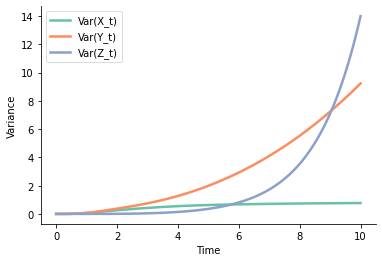

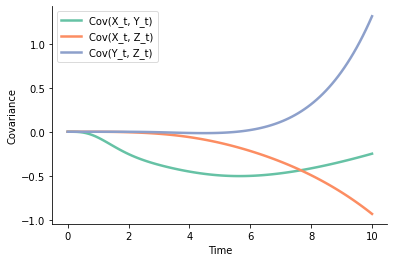

In [70]:
me.plots.sim_mean_plot(sim) #, save='model_42222_mean.pdf')
me.plots.sim_variance_plot(sim) #, save='model_42222_var.pdf')
me.plots.sim_covariance_plot(sim) #, save='model_42222_cov.pdf')

##### true topology model selection (topology A)

In [3]:
# load result
res = pickle.load(open('estimation_data_pathway_topology_n1000_t11_2_toptrue3125.pickle', 'rb'))

In [5]:
model_probs = me.selection.compute_model_probabilities(res)
net_names = [est.net.net_name for est in res]

inds = (- model_probs).argsort()
model_probs_desc = model_probs[inds]
net_names_desc = np.array(net_names)[inds]

In [7]:
print(model_probs_desc[:10])
print(net_names_desc[:10])

[4.01548985e-01 2.65501834e-01 1.81420908e-01 1.14624984e-01
 3.60233626e-02 8.68690121e-04 1.06347828e-05 4.87541599e-07
 5.78062316e-08 5.56034643e-08]
['net42513' 'net42514' 'net42515' 'net42512' 'net43511' 'net43512'
 'net43513' 'net43514' 'net42511' 'net43515']


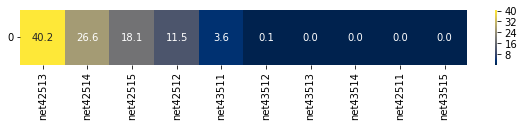

In [10]:
plt.figure(figsize=(10,1))
df = pd.DataFrame(np.array([model_probs_desc[:10]]) * 100.0, columns=net_names_desc[:10]) # , index=rows
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.savefig('./model_probs.pdf', bbox_inches='tight')

##### topology B model selection

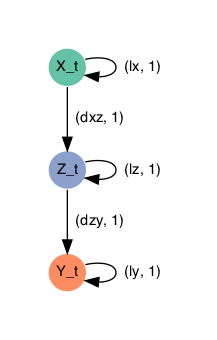

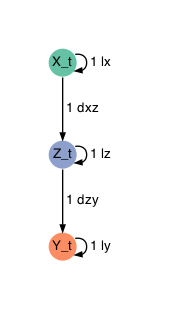

In [12]:
# one example of a topology B network
t = [
        {'start': 'X_t', 'end': 'Z_t', 'rate_symbol': 'dxz', 'type': 'S -> E', 'reaction_steps': 1},
        {'start': 'Z_t', 'end': 'Y_t', 'rate_symbol': 'dzy', 'type': 'S -> E', 'reaction_steps': 1},
        {'start': 'X_t', 'end': 'X_t', 'rate_symbol': 'lx', 'type': 'S -> S + S', 'reaction_steps': 1},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'ly', 'type': 'S -> S + S', 'reaction_steps': 1},
        {'start': 'Z_t', 'end': 'Z_t', 'rate_symbol': 'lz', 'type': 'S -> S + S', 'reaction_steps': 1},
        ]

net = me.Network('net_true')
net.structure(t)
me.plots.net_main_plot(net)
me.plots.net_hidden_plot(net, layout='dot')

In [14]:
data = pickle.load(open('data_pathway_topology_n1000_t11_2.pickle', 'rb'))

initial_values = {'X_t': 1, 'Y_t': 0, 'Z_t': 0}
variables = {'X_t': ('X_t', ), 'Y_t': ('Y_t', ), 'Z_t': ('Z_t', )}
s = {'initial_values': initial_values, 
         'theta_bounds': {'dxz': (0.0, 1.0), 'dzy': (0.0, 1.0), 'lx': (0.0, 1.0), 'ly': (0.0, 1.0), 'lz': (0.0, 1.0)}, 
         'variables': variables}

model_list = [('model_true', t, s)]

d = {
# model set
'model_set': model_list,

# data/model settings
'data': data,
'mean_only': False, # True or False

# nested sampling settings
'nlive':                    250, # 250 # 1000
'tolerance':                0.1, # 0.1 # 0.05 # 0.01
'bound':                    'multi',
'sample':                   'unif'
}

In [15]:
# estimation
res_test = me.select_models(d)

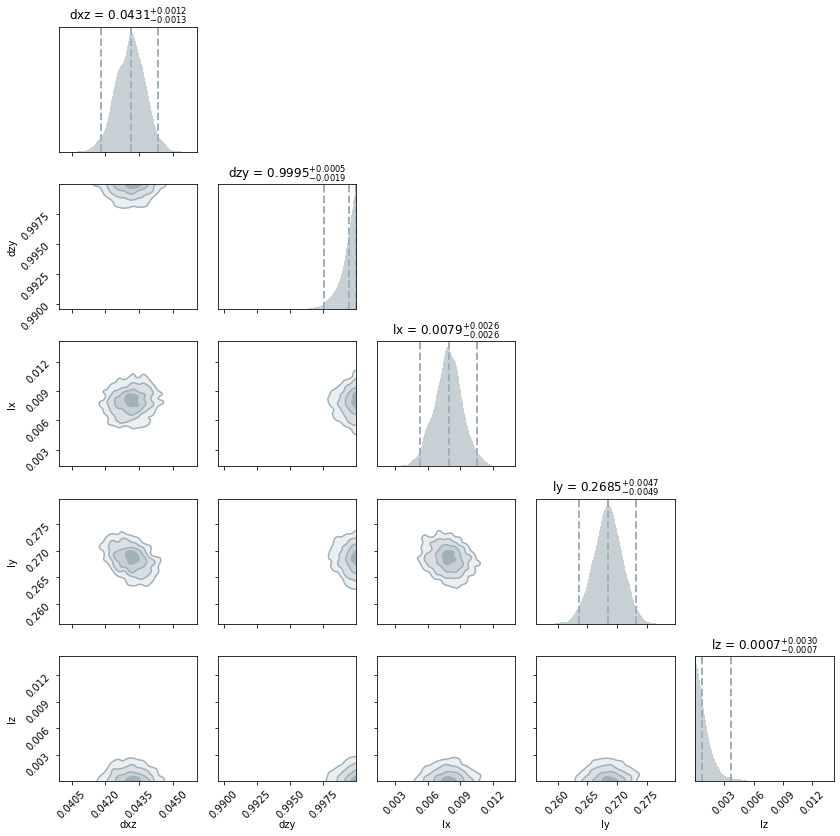

In [19]:
est = res_test[0]
me.plots.est_corner_kernel_plot(est)

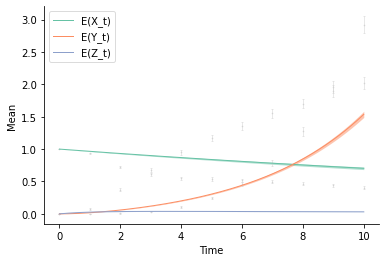

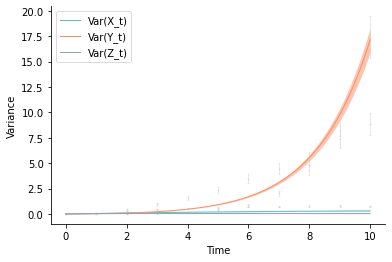

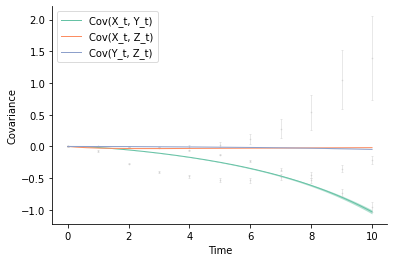

In [18]:
est = res_test[0]
me.plots.est_bestfit_mean_plot(est, data=True, conf=True)
me.plots.est_bestfit_variance_plot(est, data=True, conf=True)
me.plots.est_bestfit_covariance_plot(est, data=True, conf=True)

In [20]:
data.data_variables

['X_t', 'Y_t', 'Z_t']